# Homework 3

## IRIS data

Is there a relationship between sepal and petal dimensions? Could these features be used to distinguish the species? We use a dataset of three different species to explore.

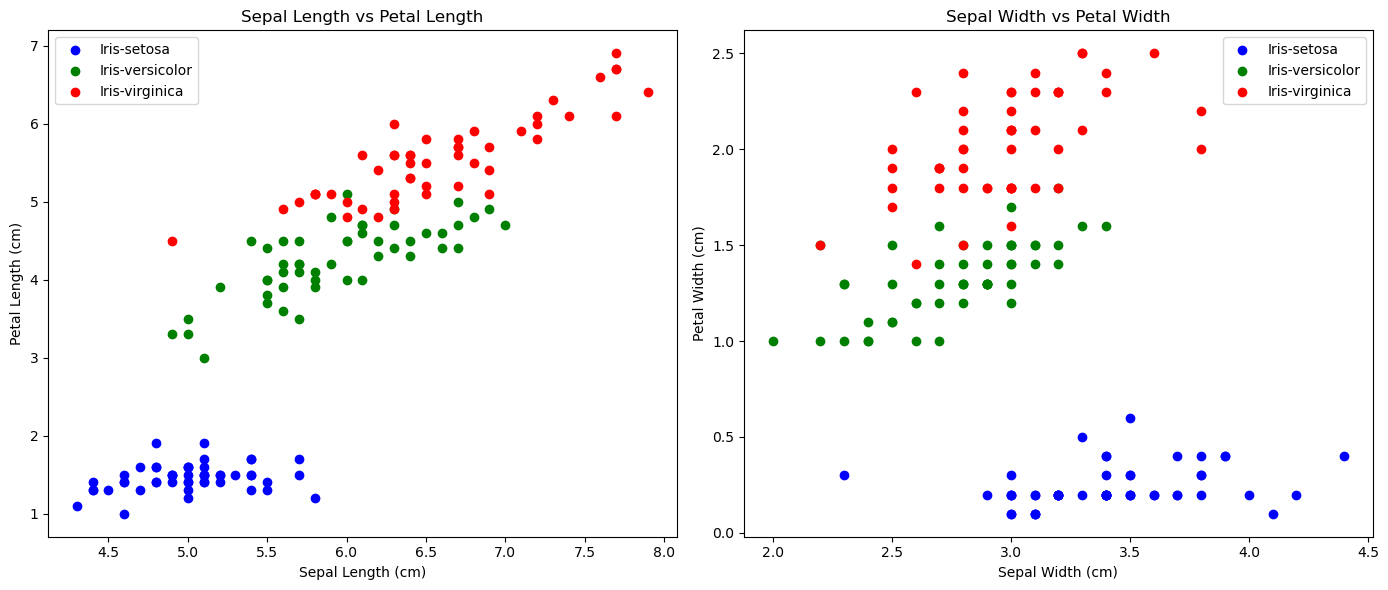

In [218]:
import pandas as pd

iris_data = pd.read_csv('IRIS.csv')

import matplotlib.pyplot as plt
import seaborn as sns

species_colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'}

# Scatter plots
plt.figure(figsize=(14, 6))

# Sepal length vs Petal length
plt.subplot(1, 2, 1)
for species, color in species_colors.items():
    subset = iris_data[iris_data['species'] == species]
    plt.scatter(subset['sepal_length'], subset['petal_length'], label=species, color=color)
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()

# Sepal width vs Petal width
plt.subplot(1, 2, 2)
for species, color in species_colors.items():
    subset = iris_data[iris_data['species'] == species]
    plt.scatter(subset['sepal_width'], subset['petal_width'], label=species, color=color)
plt.title('Sepal Width vs Petal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

plt.tight_layout()
plt.show()


From the scatter plots we can see that Iris-setosa (blue) has smaller petal lengths and widths and forms a distinct cluster compared to the other two species. Iris-versicolor (green) and Iris-virginica (red) have overlapping petal lengths and widths. Generally petal length (width) increase with sepal length (width).

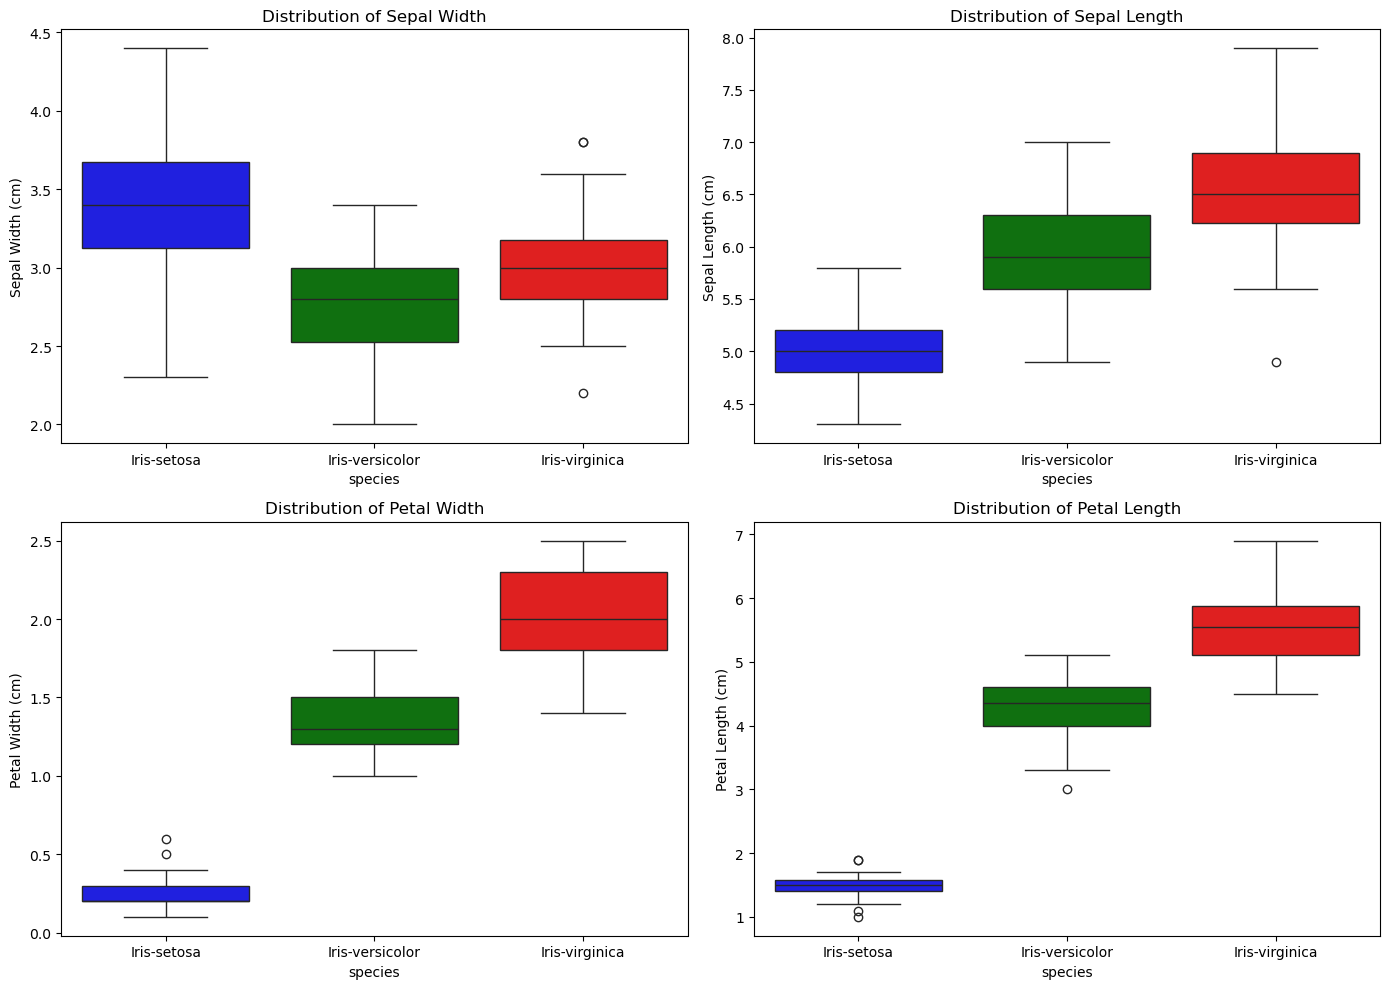

In [221]:
# Box plots
plt.figure(figsize=(14, 10))

# Variables
features = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=feature, data=iris_data, hue='species', palette=species_colors, dodge=False)
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.ylabel(f'{feature.replace("_", " ").title()} (cm)')

plt.tight_layout()
plt.show()

Iris-setosa has a bit larger sepal widths than the other two species. Sepal length is clearly different between the three species. The petal dimensions are distinctively different between the three species. Iris-setosa has the smallest petal width and length. Iris-versicolor and Iris-virginica seem to have some overlap. Iris-virginica generally has the largest dimensions.

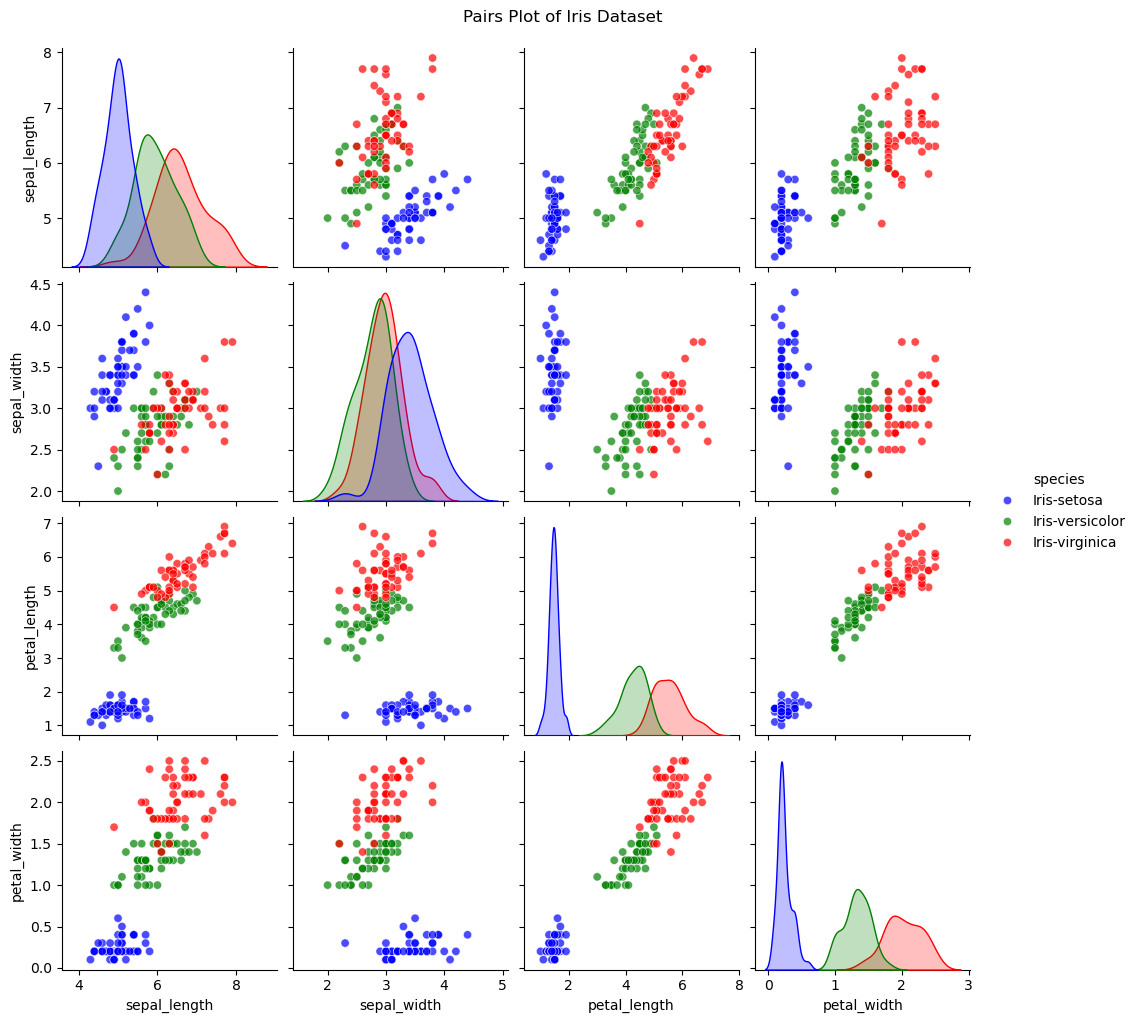

In [224]:
# Pairs-plot
sns.pairplot(
    iris_data, 
    hue='species', 
    palette=species_colors, 
    diag_kind='kde', 
    plot_kws={'alpha': 0.7}
)
plt.suptitle('Pairs Plot of Iris Dataset', y=1.02)
plt.show()

The three species form distinct clusters. There is also a clear positive linear correlation between length and width. Especially petal dimensions can be used to distinguish species, and sepal dimensions also provide some separation.

## Birdwatching

Which birds are the most prevalent? In which months do different birds mostly appear?

### Understanding the 'Antal' variable

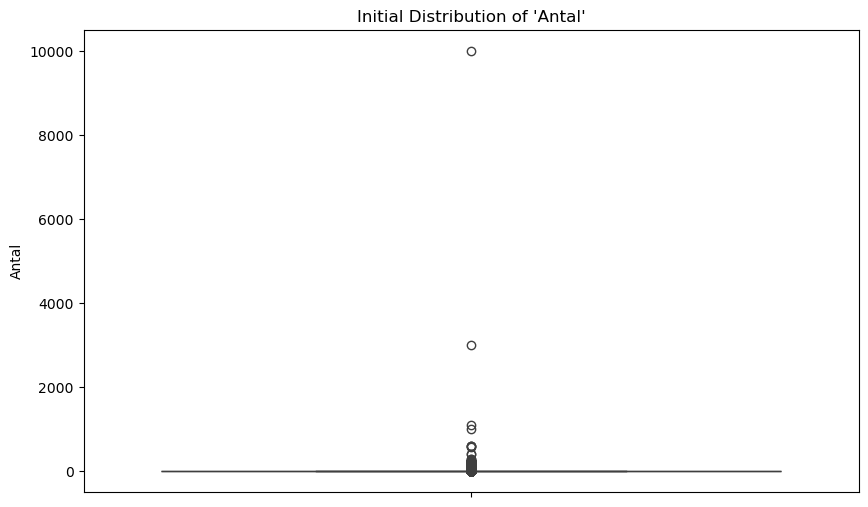

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
art_data_original = pd.read_csv('artportalen.csv')

# Replace 'noterad' with 1 in the Antal column
art_data_original['Antal'] = art_data_original['Antal'].replace("noterad", 1)

# Convert 'Antal' to numeric, setting invalid entries to NaN
art_data_original['Antal'] = pd.to_numeric(art_data_original['Antal'], errors='coerce')

# Drop rows with NaN in 'Antal'
art_data_original = art_data_original.dropna(subset=['Antal'])

# Convert 'Antal' back to integers
art_data_original['Antal'] = art_data_original['Antal'].astype(int)

# Investigate distribution of 'Antal'
plt.figure(figsize=(10, 6))
sns.boxplot(art_data_original['Antal'])
plt.title("Initial Distribution of 'Antal'")
plt.show()

It seems impossible to count thousands of species at one time. Thus, let's filter the data to remove sightings of extreme magnitude, say above 10.

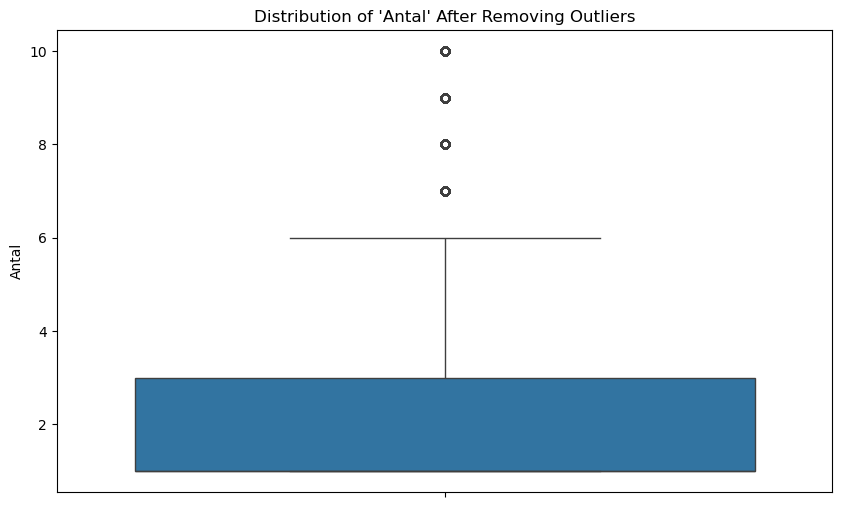

In [285]:
# Remove outliers
threshold = 10
art_data = art_data_original[art_data_original['Antal'] <= threshold]

# Recheck the distribution
plt.figure(figsize=(10, 6))
sns.boxplot(art_data['Antal'])
plt.title("Distribution of 'Antal' After Removing Outliers")
plt.show()

### What are the most prevelant species?

In [288]:
# Count species sightings
species_counts = art_data.groupby('Artnamn')['Antal'].sum().sort_values(ascending=False)

# Most prevalent species
print("Most prevalent species:")
print(species_counts.head())

Most prevalent species:
Artnamn
Koltrast      2092
Talgoxe       1651
Blåmes        1506
Storskrake    1377
Gräsand       1298
Name: Antal, dtype: int64


The three most prevalent birds are koltrast, talgoxe and blåmes.

### What is the monthly distribution of the top 3 most prevelant species?

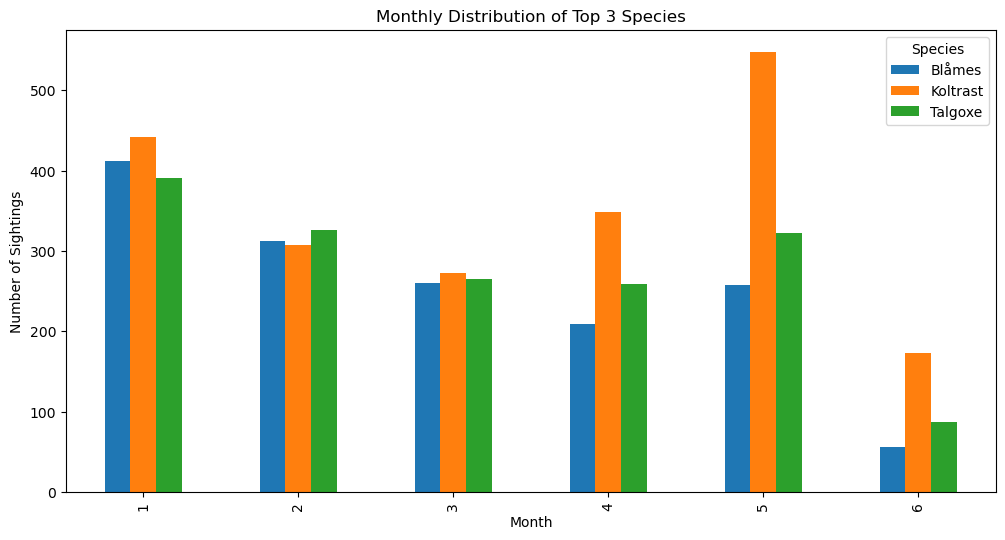

In [296]:
# Convert date
art_data['Startdatum'] = pd.to_datetime(art_data['Startdatum'])

# Extract month
art_data['Month'] = art_data['Startdatum'].dt.month

# Get top 3 species
top_3_species = species_counts.head(3).index

# Filter out top 3 species and aggregate by month
monthly_distribution = art_data[art_data['Artnamn'].isin(top_3_species)].groupby(['Artnamn', 'Month'])['Antal'].sum().unstack()

# Plot the monthly distribution
monthly_distribution.T.plot(kind='bar', figsize=(12, 6), title='Monthly Distribution of Top 3 Species')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.legend(title='Species')
plt.show()

The plot only shows sightings in six months and a decline in sightings in June, which indicates that the dataset is incomplete and ends during June. For the five months with complete data, there seems to be a decline in sightings of the top 3 bird types, and clearly more sightings of koltrast in May compared to the other two birds.

### What are the rarest species?

In [300]:
# Species with the smallest total sightings
rarest_species = species_counts[species_counts == species_counts.min()]

print("Rarest species:")
print(rarest_species)

Rarest species:
Artnamn
Ormvråk, underarten buteo    1
Ägretthäger                  1
Vinterhämpling               1
Lappsparv                    1
Bivråk                       1
Varfågel                     1
Ob. korsnäbb                 1
Ejder                        1
Rosenfink                    1
Röd glada                    1
Rödbena                      1
Tornfalk                     1
Bändelkorsnäbb               1
Spillkråka                   1
Gravand                      1
Storlom                      1
Forsärla                     1
Fjällvråk                    1
Strömstare                   1
Trädlärka                    1
Name: Antal, dtype: int64


Based on sightings, the above 20 species are the rarest, since they have only been spotted once.

### Which month has the highest bird acitivity?

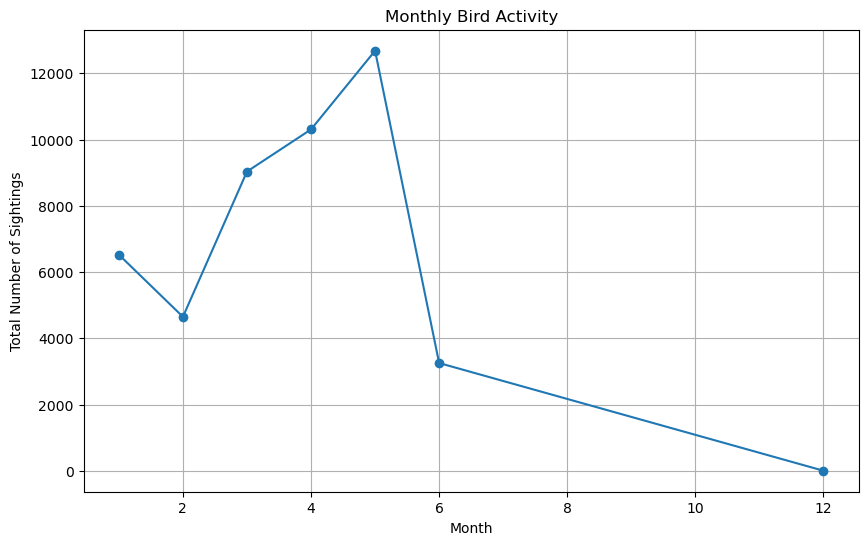

In [304]:
# Extract the month
art_data['Month'] = pd.to_datetime(art_data['Startdatum']).dt.month

# Total sightings by month
monthly_activity = art_data.groupby('Month')['Antal'].sum()

# Monthly bird activity
monthly_activity.plot(kind='line', marker='o', figsize=(10, 6), title='Monthly Bird Activity')
plt.xlabel('Month')
plt.ylabel('Total Number of Sightings')
plt.grid()
plt.show()

May shows particularly high bird activity.

### Which month has the highest number of different species?

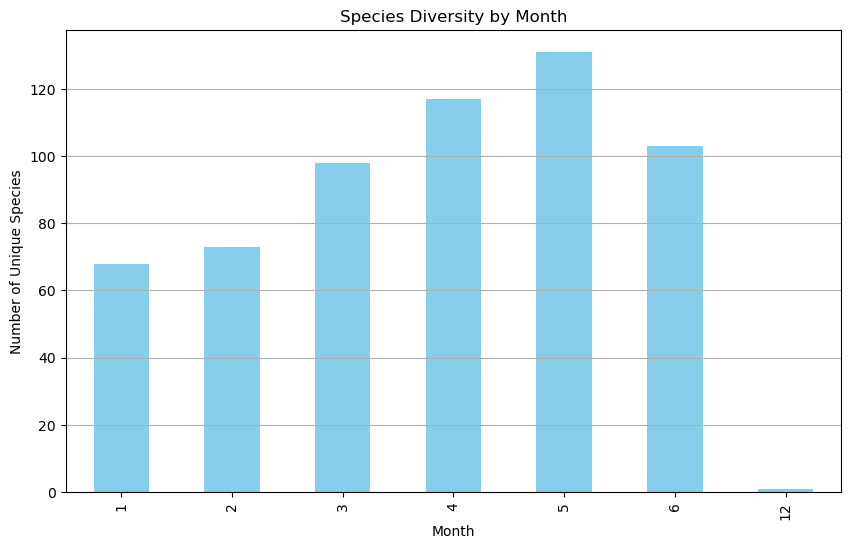

In [308]:
# Count unique species per month
species_diversity = art_data.groupby('Month')['Artnamn'].nunique()

# Diversity by month
species_diversity.plot(kind='bar', color='skyblue', figsize=(10, 6), title='Species Diversity by Month')
plt.xlabel('Month')
plt.ylabel('Number of Unique Species')
plt.grid(axis='y')
plt.show()

May shows the highest diversity in bird types.

### Which birds have only been spotted in one single month?

In [312]:
# Aggregate unique months for each species
species_months = art_data.groupby('Artnamn')['Month'].nunique()

# Filter species observed in only one month
exclusive_species = species_months[species_months == 1]

# Display exclusive species
print("Species observed in only one month:")
print(exclusive_species)

Species observed in only one month:
Artnamn
Bivråk                       1
Buskskvätta                  1
Bändelkorsnäbb               1
Doppingfåglar                1
Ejder                        1
Europeisk skata              1
Fiskgjuse                    1
Fjällvråk                    1
Forsärla                     1
Gravand                      1
Gråhakedopping               1
Grönbena                     1
Gulärla                      1
Göktyta                      1
Hussvala                     1
Knipskrake                   1
Kungsfiskare                 1
Kustlabb                     1
Kärrsångare                  1
Lappsparv                    1
Ljungpipare                  1
Lärkfalk                     1
Nordlig gulärla              1
Nordsjösilltrut              1
Ob. gås                      1
Ob. korsnäbb                 1
Ob. skarv                    1
Ormvråk, underarten buteo    1
Rosenfink                    1
Röd glada                    1
Rödbena                   

There seem to be quite many birds that are rare and have been spotted in only one particular month.

## Predicting Strokes

What factors seem to cause strokes?

In [261]:
import pandas as pd

# Read the CSV file
stroke_data = pd.read_csv('stroke-data.csv')

# Select numeric columns
numeric_columns = ['age', 'avg_glucose_level', 'bmi']

# Get summary statistics
summary = stroke_data[numeric_columns].describe().loc[['count', 'mean', 'std']]

# Round values and convert to integers
summary = summary.round(0).astype(int)

# Print the summary statistics
print("Summary Statistics:")
print(summary)


Summary Statistics:
        age  avg_glucose_level   bmi
count  5110               5110  4909
mean     43                106    29
std      23                 45     8


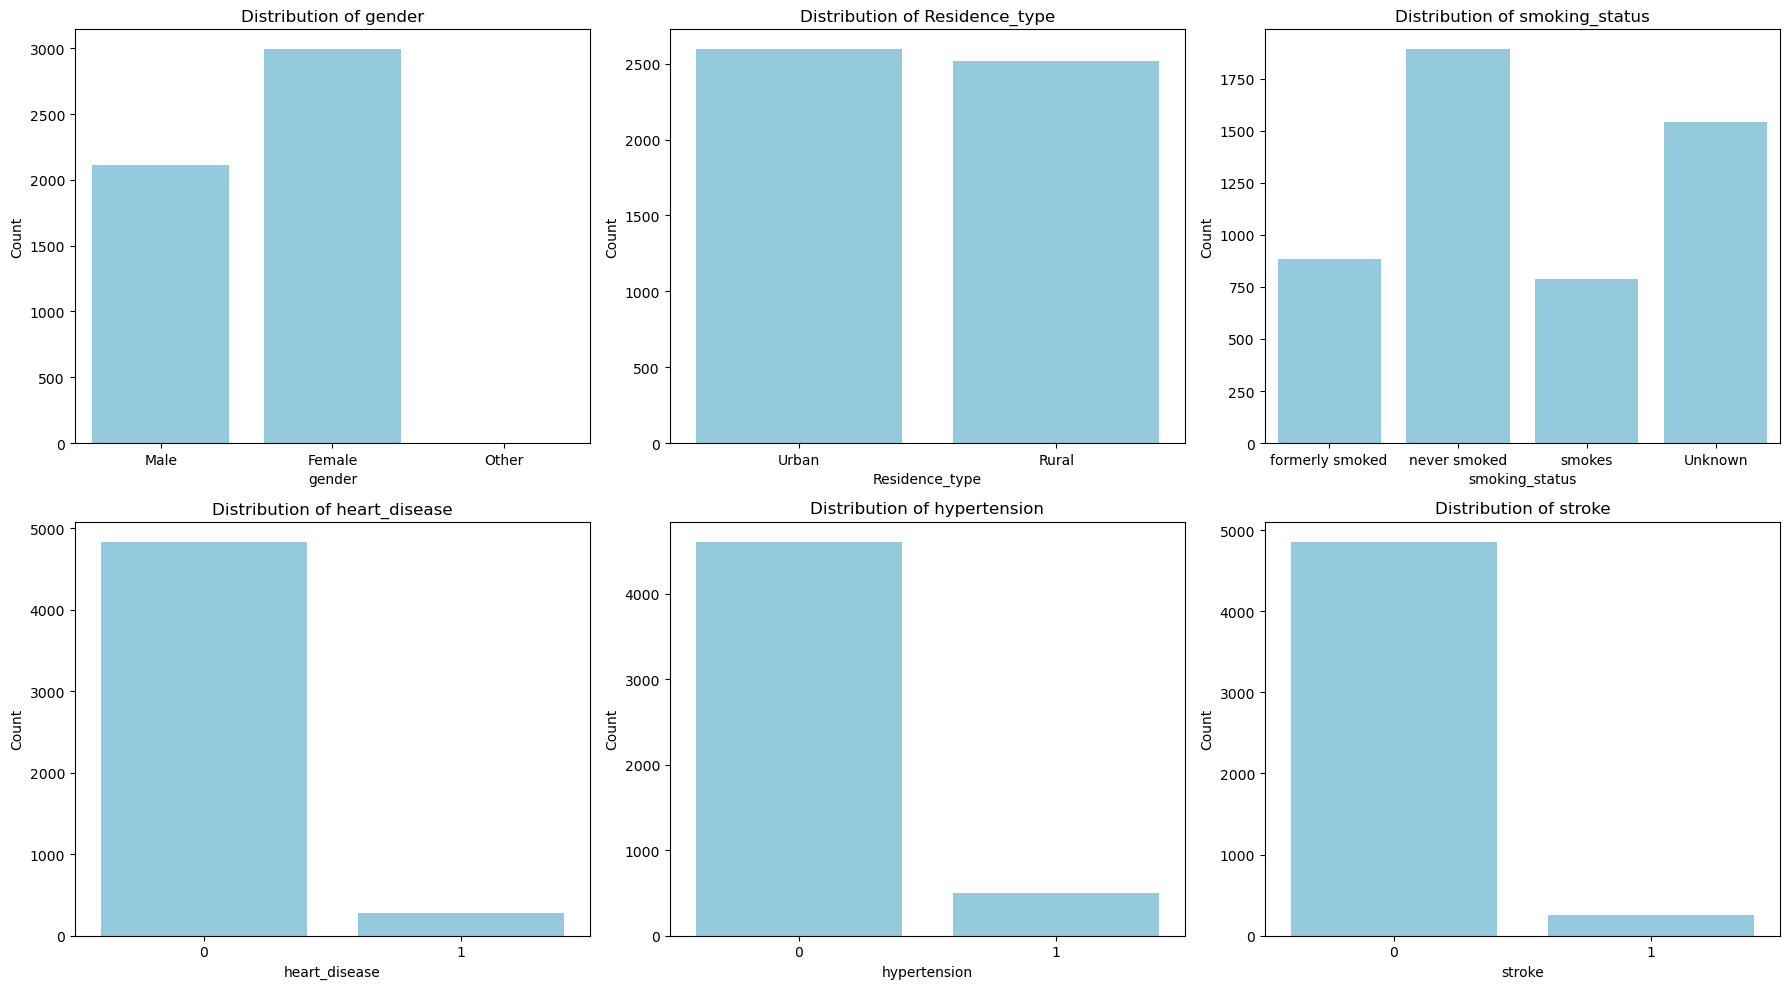

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical variables
categorical_columns = ['gender', 'Residence_type', 'smoking_status', 'heart_disease', 'hypertension', 'stroke']

# Set up plot area
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Create a bar plot for each variable
for i, column in enumerate(categorical_columns):
    sns.countplot(data=stroke_data, x=column, ax=axes[i], hue=None, color='skyblue')
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()


There are several possible predictors of stroke in the dataset. Some variables numeric, some are categorical and some are binary. I will use these three levels to formulate separate questions and try to visualize the results.

### 1. Age, BMI and Glucose Levels

How do age, BMI, and average glucose levels correlate with the likelihood of having a stroke?

Correlation Matrix:
                        age       bmi  avg_glucose_level    stroke
age                1.000000  0.324296           0.238171  0.245257
bmi                0.324296  1.000000           0.166876  0.036110
avg_glucose_level  0.238171  0.166876           1.000000  0.131945
stroke             0.245257  0.036110           0.131945  1.000000


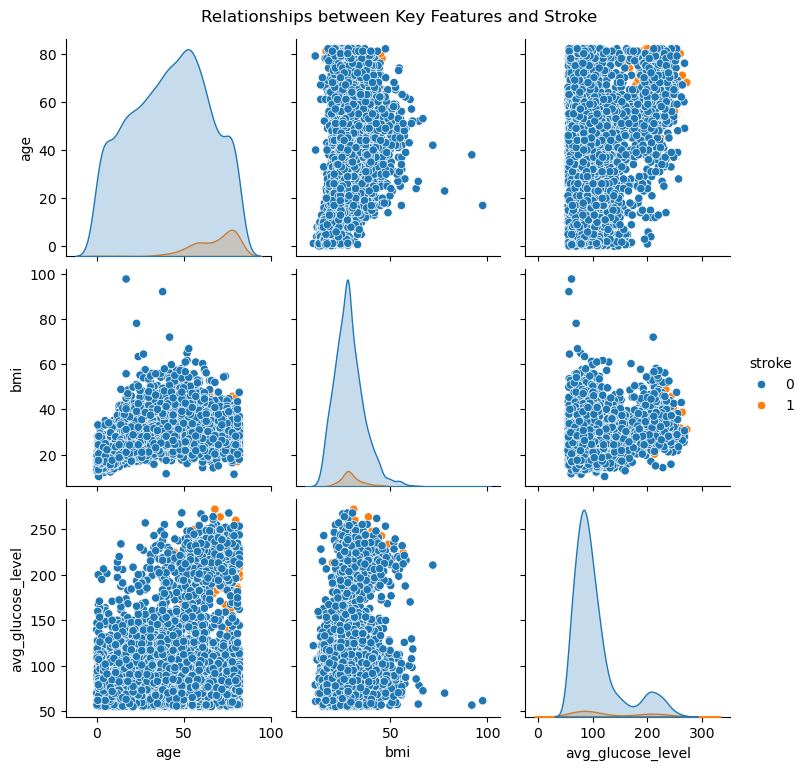

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Fill missing BMI values with the median
stroke_data['bmi'] = stroke_data['bmi'].fillna(stroke_data['bmi'].median())

# Correlation matrix for numerical features
correlation_matrix = stroke_data[['age', 'bmi', 'avg_glucose_level', 'stroke']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Plot relationships
sns.pairplot(stroke_data, vars=['age', 'bmi', 'avg_glucose_level'], hue='stroke', diag_kind='kde')
plt.suptitle('Relationships between Key Features and Stroke', y=1.02)
plt.show()

It seems that glucose levels and age are strongly correlated with stroke. This is an interesting hypothesis to investigate further.

### 2. Demographic Groups

Are certain demographic groups (gender, residence type, smoking status) more prone to strokes?


Stroke Rates by Demographic Groups:

gender:
gender
Female    0.047094
Male      0.051064
Other     0.000000
Name: stroke, dtype: float64

Residence_type:
Residence_type
Rural    0.045346
Urban    0.052003
Name: stroke, dtype: float64

smoking_status:
smoking_status
Unknown            0.030440
formerly smoked    0.079096
never smoked       0.047569
smokes             0.053232
Name: stroke, dtype: float64


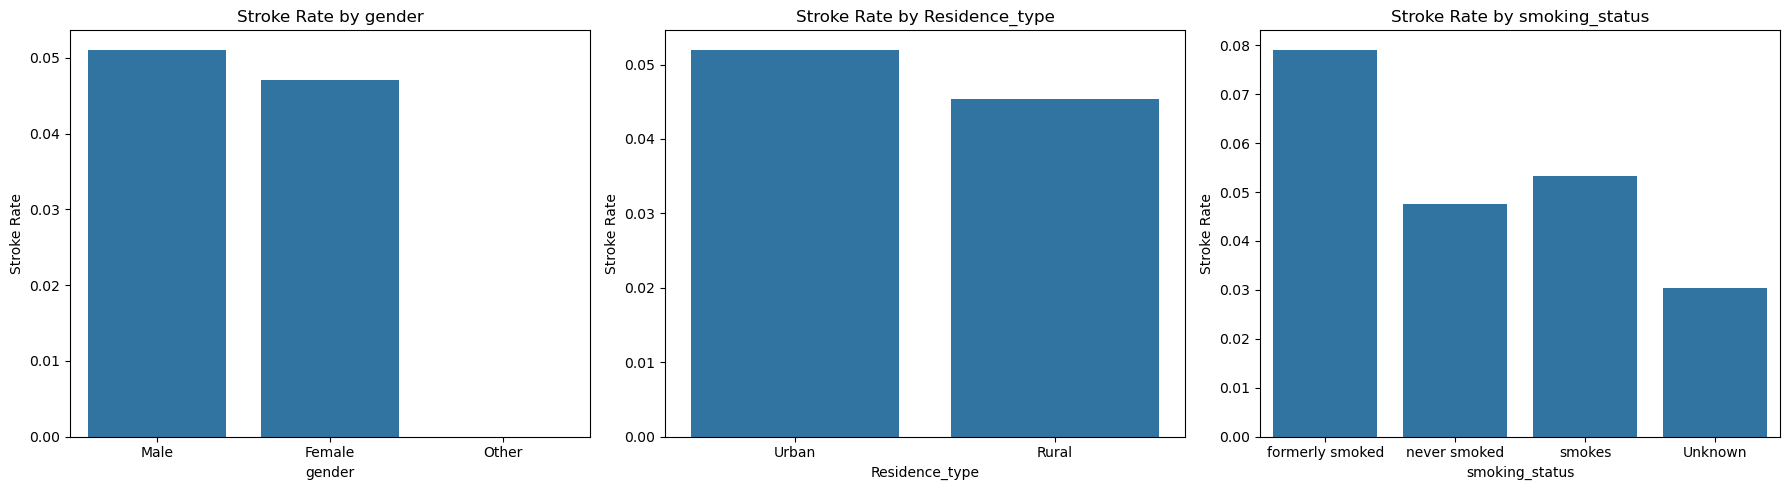

In [271]:
# Proportion of strokes by categorical features
categorical_features = ['gender', 'Residence_type', 'smoking_status']
stroke_rates = {
    feature: stroke_data.groupby(feature)['stroke'].mean() for feature in categorical_features
}

print("\nStroke Rates by Demographic Groups:")
for feature, rates in stroke_rates.items():
    print(f"\n{feature}:")
    print(rates)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(categorical_features):
    sns.barplot(data=stroke_data, x=feature, y='stroke', ax=axes[i], errorbar=None)
    axes[i].set_title(f'Stroke Rate by {feature}')
    axes[i].set_ylabel('Stroke Rate')

plt.tight_layout()
plt.show()

It seems that males, people in rural areas and people who smoke or formerly smoked are more prone to getting a stroke. This would need to be tested further.

### 3. Hypertension and Heart Disease

Does the presence of hypertension or heart disease significantly increase stroke risk?


Stroke Rates by Hypertension and Heart Disease:
heart_disease         0         1
hypertension                     
0              0.033864  0.160377
1              0.122120  0.203125


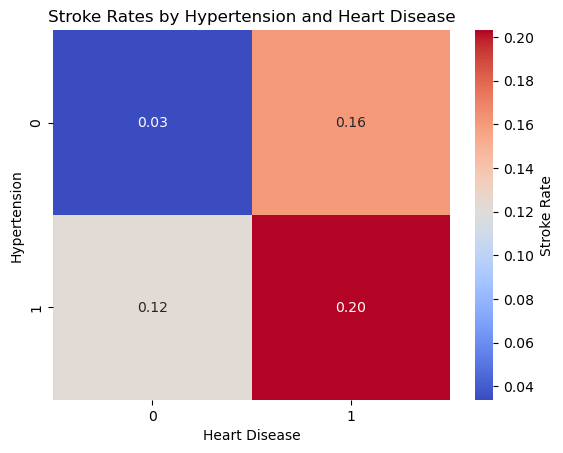

In [275]:
# Stroke rates by hypertension and heart disease
stroke_rates_comorbidity = stroke_data.groupby(['hypertension', 'heart_disease'])['stroke'].mean().unstack()

print("\nStroke Rates by Hypertension and Heart Disease:")
print(stroke_rates_comorbidity)

# Visualize impact of comorbidities
sns.heatmap(stroke_rates_comorbidity, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Stroke Rate'})
plt.title('Stroke Rates by Hypertension and Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Hypertension')
plt.show()

There seems to be a clear indication that people with hypertension and heart disease are more likely to have a stroke. These are also interesting predictors to investigate further.

## Cleaning Data

A dataset of the number of cell phones in different countries over the years. The data is cleaned step by step below.

First, replace 'k', 'M' and 'B' with '000', '000000' and '000000000', respectively.

In [387]:
import numpy as np
import pandas as pd

# Load the cell phone data
cell_phones_data = pd.read_csv('cell_phones_total.csv')

# Function to convert string-based numbers to floats
def convert_numeric(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
        elif 'B' in value:
            return float(value.replace('B', '')) * 1e9
    try:
        return float(value)
    except ValueError:
        return np.nan

# Apply the conversion function to all columns except 'iso-3'
cell_phones_data_cleaned = cell_phones_data.copy()
for col in cell_phones_data.columns[1:]:
    cell_phones_data_cleaned[col] = cell_phones_data_cleaned[col].apply(convert_numeric)

Second, fill in missing values using linear interpolation, which assumes a gradual progression between known values, which could align well with trends in technology usage.

In [390]:
# Handle missing values using linear interpolation
cell_phones_data_cleaned.iloc[:, 1:] = cell_phones_data_cleaned.iloc[:, 1:].interpolate(
    method='linear', axis=1
)

Now, let's double-check for any remaining missing values.

In [393]:
# Double-check for any remaining missing values
remaining_missing = cell_phones_data_cleaned.isnull().sum()
if remaining_missing.sum() > 0:
    print("Remaining missing values detected.")
    print(remaining_missing)

Remaining missing values detected.
iso-3     0
1960     14
1965     14
1966     14
1967     14
1968     14
1969     14
1970     14
1971     14
1972     14
1973     14
1974     14
1975     14
1976     14
1977     14
1978     14
1979     14
1980     14
1981     14
1982     13
1983     13
1984     13
1985     13
1986     13
1987     13
1988     13
1989     13
1990      7
1991      7
1992      7
1993      7
1994      7
1995      7
1996      7
1997      7
1998      7
1999      7
2000      7
2001      7
2002      6
2003      6
2004      4
2005      3
2006      3
2007      3
2008      3
2009      2
2010      1
2011      1
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
dtype: int64


There seem to be quite a few missing values remaining, especially in earlier years. Let's see if some rows have a lot of missing values, and if so, they may not provide meaningful insights and are removed.

In [395]:
# Drop rows with more than 20 missing values
threshold = 20
cell_phones_data_cleaned = cell_phones_data_cleaned.dropna(thresh=len(cell_phones_data.columns) - threshold)

Let's double-check for remaining missing values again.

In [397]:
# Double-check for any remaining missing values
remaining_missing = cell_phones_data_cleaned.isnull().sum()
if remaining_missing.sum() > 0:
    print("Remaining missing values detected.")
    print(remaining_missing)

Remaining missing values detected.
iso-3    0
1960     1
1965     1
1966     1
1967     1
1968     1
1969     1
1970     1
1971     1
1972     1
1973     1
1974     1
1975     1
1976     1
1977     1
1978     1
1979     1
1980     1
1981     1
1982     0
1983     0
1984     0
1985     0
1986     0
1987     0
1988     0
1989     0
1990     0
1991     0
1992     0
1993     0
1994     0
1995     0
1996     0
1997     0
1998     0
1999     0
2000     0
2001     0
2002     0
2003     0
2004     0
2005     0
2006     0
2007     0
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
dtype: int64


Now, there are a lot fewer missing values left. We could use averages to fill these, assuming that countries have similar circumstances.

In [405]:
# Fill missing values with the mean of each column
cell_phones_data_cleaned.iloc[:, 1:] = cell_phones_data_cleaned.iloc[:, 1:].apply(
    lambda x: x.fillna(x.mean()), axis=0
)

With no remaining missing values we can display the data.

In [413]:
# Sort the cleaned data by the values in the year 2015
sorted_data = cell_phones_data_cleaned.sort_values(by='2015', ascending=False)

# Select and display the cleaned table for 2015–2019
cleaned_table = sorted_data[['iso-3', '2015', '2016', '2017', '2018', '2019']].reset_index(drop=True)

# Display results
print(cleaned_table.head())

  iso-3          2015          2016          2017          2018          2019
0   CHN  1.290000e+09  1.360000e+09  1.470000e+09  1.650000e+09  1.730000e+09
1   IND  1.000000e+09  1.130000e+09  1.170000e+09  1.180000e+09  1.150000e+09
2   USA  3.820000e+08  3.960000e+08  4.000000e+08  4.220000e+08  4.220000e+08
3   IDN  3.390000e+08  3.860000e+08  4.350000e+08  3.190000e+08  3.450000e+08
4   BRA  2.580000e+08  2.440000e+08  2.180000e+08  2.070000e+08  2.070000e+08
